# Cummulative distribution function

## Outine
- What is the Cummulative distribution function (CDF)
- Determining p-values from the CDF
- Wrap up


  
## What is the Cummulative distributive function
   
The cumulative distribution function (FX) gives the probability that the random variable X is less than or equal to a certain value,  x. 

Its formula is: Sum the values for all outcomes less than or equal to x is the "cumulative distribution".

Use the cummulative distribution function, **CDF** to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.

<img src="images/CDF1.png" width="400">

and the formula for the CDF is:

<img src="images/CDF_equation.png" width="400">

## p values from Cumulative Distribution Functions


Imagine that we have a t statistic with 25 degrees of freedom.

[Scipy](https://www.scipy.org/scipylib/index.html) provides a [t distribution class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) that we can use to get values
from the t statistic [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF).

As a start, we plot the PDF for a t statistic with 25 degrees of freedom:

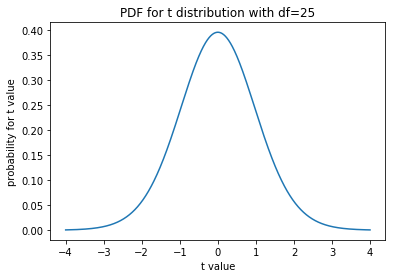

In [75]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
# Make a t distribution object for t with 25 degrees of freedom
t_dist = scipy.stats.t(25)   
# Plot the PDF
t_values = np.linspace(-4, 4, 1000)
plt.plot(t_values, t_dist.pdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value')
plt.title('PDF for t distribution with df=25')
plt.show()


The t distribution object `t_dist` can also give us the [cumulative
distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF).  The CDF gives the area under the curve of the
PDF at and to the left of the given t value:

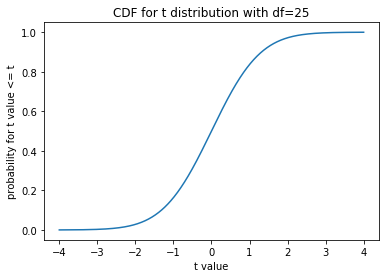

In [76]:
# Plot the CDF
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value <= t')
plt.title('CDF for t distribution with df=25')
plt.show()

As an example, let's say we have a  t value $x$ drawn from a t distribution with 25 degrees of
freedom.  **The PDF gives the probability for given values of $x$.**  Because it
is a probability density, the sum of the probabilities of all possible
values for $x$: $\infty < x < \infty$ must be 1.  

Based on this fact, the total area under the PDF curve is 1, and the maximum value of the CDF is 1.

The CDF gives us the area under the PDF curve **at and to the left of a given t
value $x$.**  Therefore it is the probability that we will observe a value $x <=
t$ if we sample a value $x$ from a t distribution of (here) 25 degrees of
freedom.

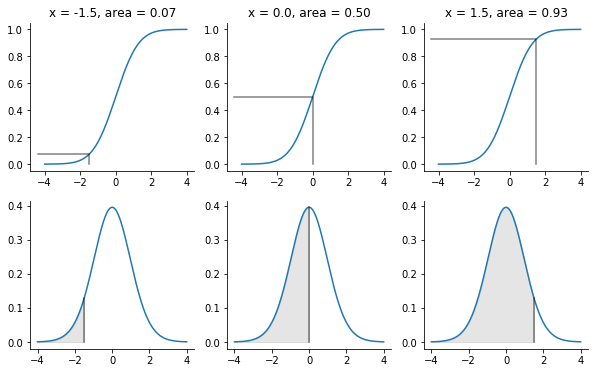

In [77]:
# Show relationship of PDF and CDF for three example t values.
example_values = (-1.5, 0, 1.5)
pdf_values = t_dist.pdf(t_values)
cdf_values = t_dist.cdf(t_values)
fill_color = (0, 0, 0, 0.1)  # Light gray in RGBA format.
line_color = (0, 0, 0, 0.5)  # Medium gray in RGBA format.
fig, axes = plt.subplots(2, len(example_values), figsize=(10, 6))
for i, x in enumerate(example_values):
    cdf_ax, pdf_ax = axes[:,i]
    cdf_ax.plot(t_values, cdf_values)
    pdf_ax.plot(t_values, pdf_values)
    # Fill area at and to the left of x.
    pdf_ax.fill_between(t_values, pdf_values,
                        where=t_values <= x,
                        color=fill_color)
    pd = t_dist.pdf(x)  # Probability density at this value.
    # Line showing position of x on x-axis of PDF plot.
    pdf_ax.plot([x, x],
                [0, pd], color=line_color)
    cd = t_dist.cdf(x)  # Cumulative distribution value for this x.
    # Lines showing x and CDF value on CDF plot.
    x_ax_min = cdf_ax.axis()[0]  # x position of y axis on plot.
    cdf_ax.plot([x, x, x_ax_min],
                [0, cd, cd], color=line_color)
    cdf_ax.set_title('x = {:.1f}, area = {:.2f}'.format(x, cd))
    # Hide top and right axis lines and ticks to reduce clutter.
    for ax in (cdf_ax, pdf_ax):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

For example, say I have drawn a t value $x$ at random from a t distribution
with 25 degrees of freedom.  The probability that $x <= 1.5$ is:

In [79]:
# Area of PDF at and to the left of 1.5 is the CDF 
print("The probability that x < 1.5):", t_dist.cdf(1.5))
# The probability that x is equal to a specific value, is the PDF(x) 
print("The probability that x = 1.5:", t_dist.pdf(1.5))

The probability that x < 1.5): 0.9269307674309903
The probability that x = 1.5: 0.12883201625831153


## Wrap up
We discussed:
- What is the Cummulative distribution function (CDF)
- Determining p-values from the CDF